データの確認

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# データの読み込み
train = pd.read_csv('winequality_white.csv')
# test = pd.read_csv('output_test.csv')

# データサイズの確認
print(f'Train shape: {train.shape} ')

# 先頭行の出力
train.head()
# test.head()

Train shape: (4898, 11) 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,6


統計量の確認

In [2]:
train.describe(include='all')
# test.describe(include='all')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,3.820000,1.080000,14.200000,9.000000


相関関係の確認

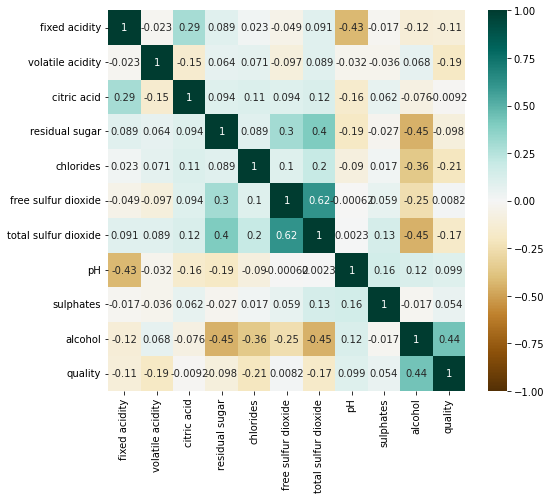

In [3]:
#変数間の相関関係のヒートマップ
fig = plt.figure(figsize=(8,7))
ax = sns.heatmap(train.corr(), annot=True, cmap='BrBG', vmin=-1, vmax=1)

# #カテゴリ変数とラベルの関係
# categorical_feature = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
# for feature_name in categorical_feature:
#     fig = plt.figure(figsize=(30,5))
#     plt.xticks(rotation=45, ha="right")
#     ax = sns.countplot(x=feature_name, hue='>50K, <=50K.', data=train)
plt.show()

欠損値とクラスの関係（欠損値がある場合はP.94参照）

In [4]:
print(f'Null of Train: {(train.isnull().sum())}')
# print(f'Null of Test: {(test.isnull().sum())}')

Null of Train: fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


前処理

In [5]:

from sklearn.preprocessing import OrdinalEncoder

# # カテゴリカル変数の定義
# categorical_feature = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']

# # 特徴量エンジニアリング
# train = train.dropna(subset=['workclass', 'occupation', 'native-country']) #欠損値があるカラムがあれば指定
# test = test.dropna(subset=['workclass', 'occupation', 'native-country']) #欠損値があるカラムがあれば指定

df = pd.concat([train])
oe = OrdinalEncoder()
# df[categorical_feature] = oe.fit_transform(df[categorical_feature]).astype(int)

# df['>50K, <=50K.'] = df['>50K, <=50K.'].replace({' <=50K': 0, ' >50K': 1})
# df['>50K, <=50K.'] = df['>50K, <=50K.'].replace({' <=50K.': 0, ' >50K.': 1})

# データの正規化
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df = df.rename(columns={'quality': 'target'})
# Separate the target column and the rest of the columns
df['target'] = pd.factorize(df['target'])[0]
df_target = df['target']
df_without_target = df.drop(columns=['target'])

# Fit and transform the data without the target column
# df_without_target_scaled = pd.DataFrame(scaler.fit_transform(df_without_target), columns = df_without_target.columns)


from sklearn import preprocessing
df_without_target_scaled = pd.DataFrame(preprocessing.scale(df_without_target), columns=df_without_target.columns)

# Combine the target column and the scaled data
df_scaled = pd.concat([df_without_target_scaled, df_target], axis=1)

df_scaled = df_scaled[df_scaled['target'].apply(lambda x: x not in [5, 6])]
df_scaled.to_csv('wine.csv', index=False)
unique_values = df_scaled.nunique()

print(unique_values)
# train = df[df['Survived'].notnull()]#ラベルに欠損値がある場合
# test = df[df['Survived'].notnull()].drop(columns=['Survived'])#ラベルに欠損値がある場合

fixed acidity            67
volatile acidity        124
citric acid              87
residual sugar          310
chlorides               159
free sulfur dioxide     128
total sulfur dioxide    246
pH                      103
sulphates                79
alcohol                 103
target                    5
dtype: int64
